In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from enum import Enum

In [2]:
input_path = path.join('..', '원본 데이터')
output_path = path.join('..', '정제 데이터')
fps = 0.05

In [3]:
cork_fast = pd.read_csv(path.join(input_path, '빠르게.csv'))
runs = []

for column in cork_fast.columns:
    names = column.split('Run #')
    run_no = int(names[1]) - 1

    if run_no >= len(runs):
        runs.append(pd.DataFrame())

    runs[run_no][names[0].strip()] = cork_fast[column]

columns = {
    't': 'Time (s)',
    'F': 'Force (N)',
    'x': 'Position (m)',
    'v': 'Velocity (m/s)',
    'a': 'Acceleration (m/s²)',
}

for i in range(len(runs)):
    runs[i][columns['F']] *= -1
    runs[i] = runs[i][runs[i][columns['t']] <= 8]

In [7]:
len(runs)

13

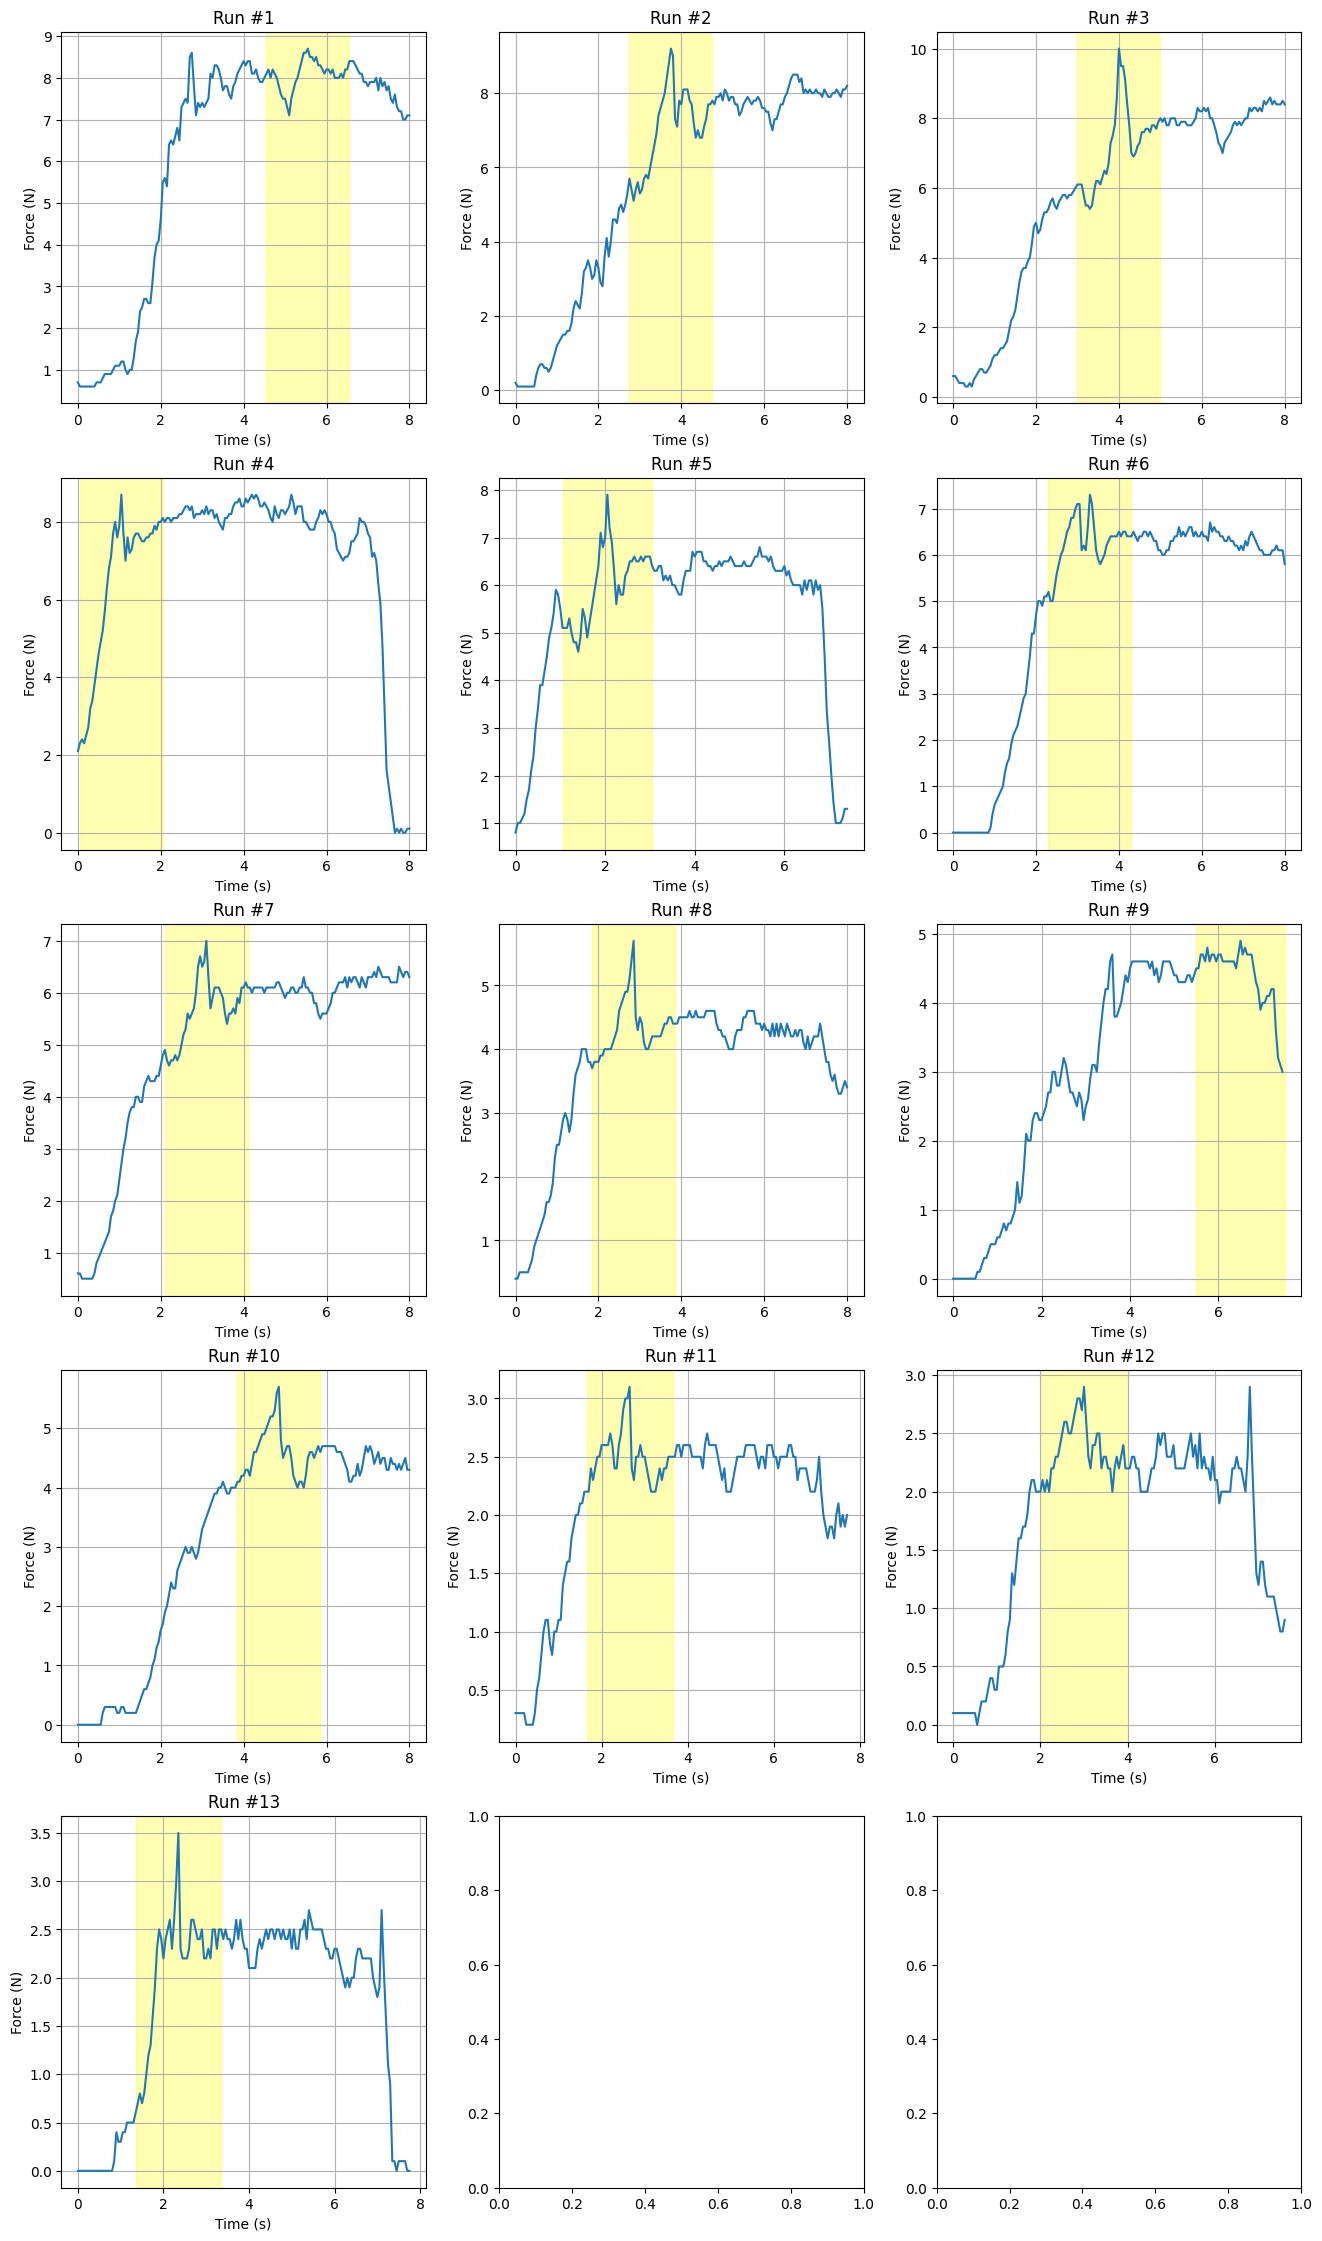

In [4]:
fig, axis = plt.subplots(5, 3, figsize=(16, 28))

for i in range(5):
    for j in range(3):
        no = i * 3 + j
        if no >= len(runs):
            continue
            
        max_F_time = runs[no][columns['t']].iloc[runs[no][columns['F']].idxmax()]
    
        axis[i, j].plot(runs[no][columns['t']], runs[no][columns['F']])
        axis[i, j].axvspan(max_F_time - 1, max_F_time + 1, color='yellow', alpha=0.3)
        axis[i, j].set_xlabel(columns['t'])
        axis[i, j].set_ylabel(columns['F'])
        axis[i, j].set_title(f'Run #{no + 1}')
        axis[i, j].grid()

- 1개
11, 12, 13
- 2개
8, ~~9~~, 10
- 3개
4, 5, 6, ~~7~~
- 4개
~~1~~, 2, 3